In [1]:
import pandas as pd

In [2]:
import numpy as np
#data = np.loadtxt(fname='categorized_particles.csv', delimiter=',')

In [3]:
df = pd.read_csv('categorized_particles.csv')

In [4]:
df.head()

,particle_id,frame_num,particle_num,time_stamp_s,ecd_um,area_pixels,perimeter,circularity,intensity_mean,intensity_std,...,max_feret_diam_um,aspect_ratio,x_left,x_right,y_top,y_bottom,edge_particle,experiment,step,type
0,47,1,48,0.0,68.375,2401,1542.88,0.11,810.09,7.39,...,546.875,0.02,621,1035,945,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
1,52,1,53,0.0,15.375,211,243.15,0.21,812.77,5.53,...,69.875,0.09,380,438,951,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
2,54,1,55,0.0,17.625,257,275.88,0.21,812.89,6.12,...,76.375,0.09,442,505,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
3,55,1,56,0.0,9.625,114,106.88,0.35,813.95,5.71,...,31.625,0.19,513,542,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
4,56,1,57,0.0,10.625,128,143.61,0.28,812.13,6.96,...,41.625,0.14,542,579,950,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines


In [5]:
import matplotlib.pyplot as plt

In [6]:
df.shape

(114708, 22)

In [7]:
df.columns

Index(['particle_id', 'frame_num', 'particle_num', 'time_stamp_s', 'ecd_um',
       'area_pixels', 'perimeter', 'circularity', 'intensity_mean',
       'intensity_std', 'intensity_min', 'intensity_max', 'max_feret_diam_um',
       'aspect_ratio', 'x_left', 'x_right', 'y_top', 'y_bottom',
       'edge_particle', 'experiment', 'step', 'type'],
      dtype='object')

In [8]:
#df.set_index('particle_id', inplace=True) 

In [9]:
df.index

RangeIndex(start=0, stop=114708, step=1)

In [10]:
df.shape

(114708, 22)

In [11]:
df.head()

,particle_id,frame_num,particle_num,time_stamp_s,ecd_um,area_pixels,perimeter,circularity,intensity_mean,intensity_std,...,max_feret_diam_um,aspect_ratio,x_left,x_right,y_top,y_bottom,edge_particle,experiment,step,type
0,47,1,48,0.0,68.375,2401,1542.88,0.11,810.09,7.39,...,546.875,0.02,621,1035,945,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
1,52,1,53,0.0,15.375,211,243.15,0.21,812.77,5.53,...,69.875,0.09,380,438,951,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
2,54,1,55,0.0,17.625,257,275.88,0.21,812.89,6.12,...,76.375,0.09,442,505,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
3,55,1,56,0.0,9.625,114,106.88,0.35,813.95,5.71,...,31.625,0.19,513,542,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
4,56,1,57,0.0,10.625,128,143.61,0.28,812.13,6.96,...,41.625,0.14,542,579,950,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines


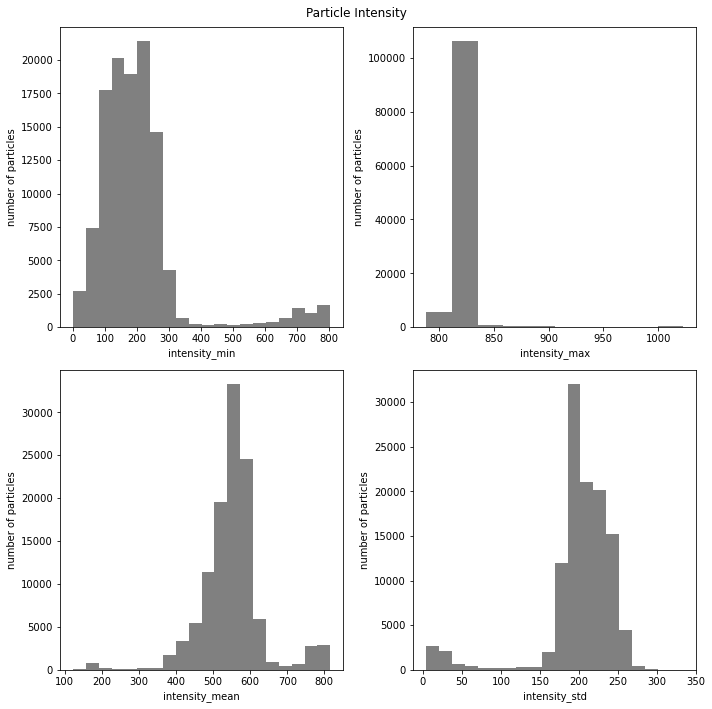

In [12]:
fig = plt.figure(figsize=(10, 10))

axes1 = fig.add_subplot(2, 2, 1) #row, column, which plot
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.set_xlabel('intensity_min')
axes1.set_ylabel('number of particles')
axes1.hist(df['intensity_min'], bins = 20, color = "grey")

axes2.set_xlabel('intensity_max')
axes2.set_ylabel('number of particles')
axes2.hist(df['intensity_max'], bins = 10, color = "grey")

axes3.set_xlabel('intensity_mean')
axes3.set_ylabel('number of particles')
axes3.hist(df['intensity_mean'], bins = 20, color = "grey")

axes4.set_xlabel('intensity_std')
axes4.set_ylabel('number of particles')
axes4.hist(df['intensity_std'], bins = 20, color = "grey")

fig.suptitle("Particle Intensity")

fig.tight_layout() #helps clean things up and for the white space 

plt.savefig('inflammation.png') 
plt.show()



Text(0, 0.5, 'circularity')

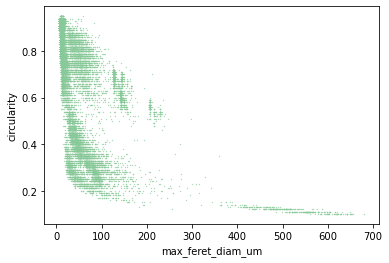

In [13]:
plt.scatter(df['max_feret_diam_um'], df['circularity'], s=0.1, color = '#88c999')

plt.show
plt.xlabel('max_feret_diam_um')
plt.ylabel('circularity')

In [14]:
types=df['type'].unique()
print(types)

['schlieren lines' 'translucent fibral' 'glass' 'dense globular' 'protein'
 'silicone oil' 'multi si oil' 'silicone oil agg.' 'dense fibral'
 'dense ring-like' 'translucent ring-like' 'translucent globular']


In [15]:
"""
probably a way to automate this but can't figure it out - christian

grouped_type=df.groupby("type")

for idx, name in enumerate(types):
    list[idx]=grouped_type.get_group(name)
return list
"""

'\nprobably a way to automate this but can\'t figure it out - christian\n\ngrouped_type=df.groupby("type")\n\nfor idx, name in enumerate(types):\n    list[idx]=grouped_type.get_group(name)\nreturn list\n'

In [27]:
grouped_type=df.groupby("type")
schlieren=grouped_type.get_group("schlieren lines")
translucent_fibral=grouped_type.get_group("translucent fibral")
glass=grouped_type.get_group("glass")
dense_glob=grouped_type.get_group("dense globular")
protein=grouped_type.get_group(types[4])
silicone_oil=grouped_type.get_group(types[5])
multi_si_oil=grouped_type.get_group(types[6])
silicone_agg=grouped_type.get_group(types[7])
dense_fibral=grouped_type.get_group(types[8])
dense_ring=grouped_type.get_group(types[9])
translucent_ring=grouped_type.get_group(types[10])
translucent_glob=grouped_type.get_group(types[11])

print("number of schlieren lines =", schlieren.shape[0])
print("number of translucent fibral particles =", translucent_fibral.shape[0])
print("number of glass particles =", glass.shape[0])
print("number of dense globular particles =", dense_glob.shape[0])
print("number of protein particles =", protein.shape[0])
print("number of silicone oil particles =", silicone_oil.shape[0])
print("number of multi silicone oil particles =", multi_si_oil.shape[0])
print("number of silicone aggregated particles =", silicone_agg.shape[0])
print("number of dense fibral particles =", dense_fibral.shape[0])
print("number of dense ring particles =", dense_ring.shape[0])
print("number of translucent ring-like particles =", translucent_ring.shape[0])
print("number of translucent globular particles =", translucent_glob.shape[0])

number of schlieren lines = 1675
number of translucent fibral particles = 4622
number of glass particles = 4959
number of dense globular particles = 41657
number of protein particles = 367
number of silicone oil particles = 58169
number of multi silicone oil particles = 3085
number of silicone aggregated particles = 40
number of dense fibral particles = 59
number of dense ring particles = 30
number of translucent ring-like particles = 31
number of translucent globular particles = 14


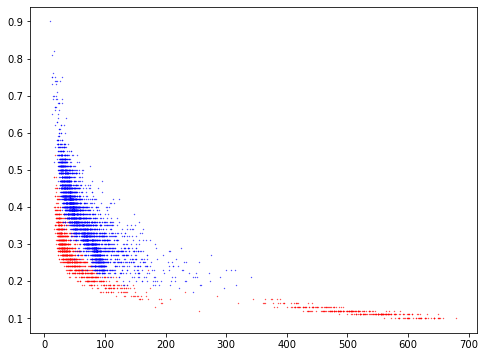

In [30]:


fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(1,1,1)

ax1.scatter(schlieren['max_feret_diam_um'], schlieren['circularity'], s=0.1, color = 'r')
ax1.scatter(translucent_fibral['max_feret_diam_um'], translucent_fibral['circularity'], s=0.1, color = 'b')

#plt.legend()
#ax1.legend(handles=[schlieren, translucent_fibral])
plt.show()